# Analisis cluster por cluster

En este primer notebook me centrare en analizar las variables categoricas cluster por cluster y de ver el comportamiento de las mismas. Este sera el primer paso del analisis bivariado con las finalidad de encontrar las caracteristicas que mejor ayudan a segmentar los clientes del dataset

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import os
import matplotlib.pyplot as plt
# Configuración de matplotlib para mejorar la visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'sans-serif'
import seaborn as sns
from IPython.display import display # Importamos la función display
# Configuracion de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

df_customer = pd.read_csv("dataset/segmented_customers.csv")
df_customer['Cluster'] = df_customer['Cluster'].astype('category')
df_customer.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,2
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,1
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,2
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,2


Primeramente vamos a ver la cantidad de elementos que contiene cada uno de nuetros clusters

In [2]:
# Tabla de Frecuencias Absolutas y Relativas de los Clústeres 

print("Análisis del tamaño de los clústeres:")
print("---------------------------------------")

# Contamos la frecuencia absoluta de cada clúster
cluster_counts = df_customer['Cluster'].value_counts().sort_index()

# Calculamos la frecuencia relativa (porcentaje)
total_customers = len(df_customer)
cluster_percentages = (cluster_counts / total_customers * 100).round(2)

# Creamos un DataFrame para mostrar el resumen
cluster_summary = pd.DataFrame({
    'Frecuencia Absoluta': cluster_counts,
    'Frecuencia Relativa (%)': cluster_percentages
})

print(cluster_summary)
print("\n")

Análisis del tamaño de los clústeres:
---------------------------------------
         Frecuencia Absoluta  Frecuencia Relativa (%)
Cluster                                              
0                        140                     3.59
1                        159                     4.08
2                        953                    24.44
3                        310                     7.95
4                        169                     4.33
5                        168                     4.31
6                        144                     3.69
7                         83                     2.13
8                        146                     3.74
9                       1320                    33.85
10                       155                     3.97
11                       153                     3.92




### Analisis Bivariado de Variables Categoricas vs Cluster

En esta seccion, realizaremos un analisis bivariado para explorar la relación entre cada variable categórica y la segmentación de clústeres.

Primero, generaremos graficos de barras apiladas para visualizar la distribucion proporcional de cada categoría dentro de cada cluster.

Luego, para un analisis más detallado, presentaremos tablas de contingencia que muestran las frecuencias absolutas y relativas de cada categoria por cluster.

Variables categóricas a analizar: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


Análisis de la variable: 'Gender' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

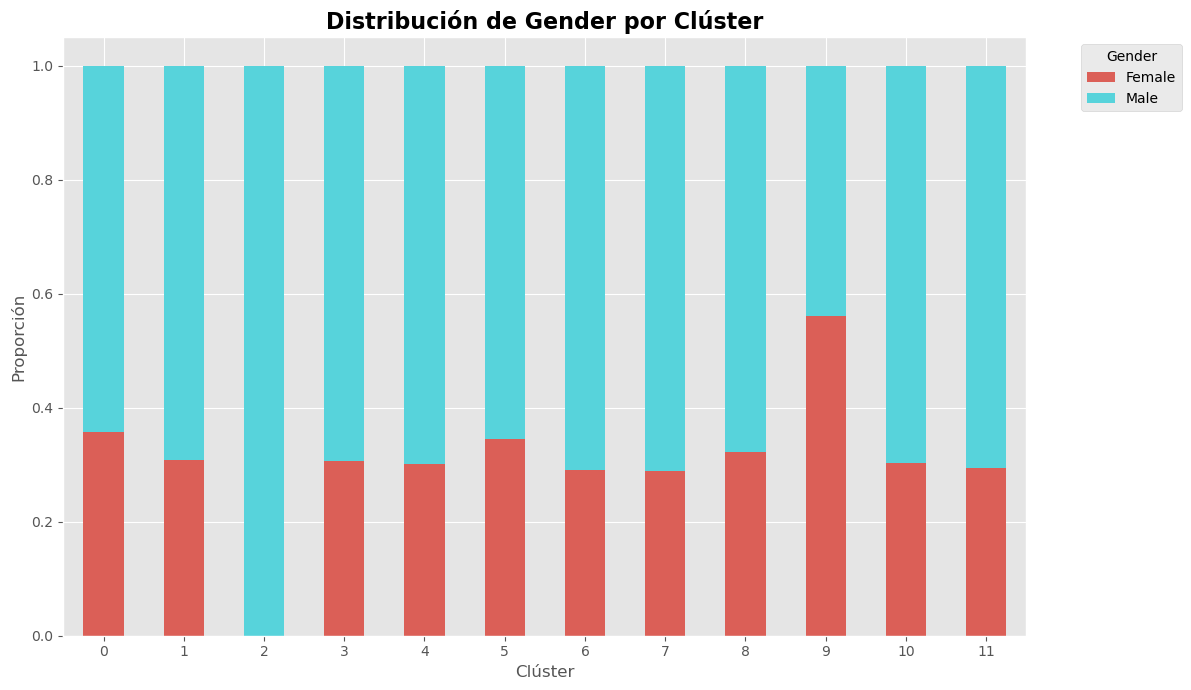


Tabla de Frecuencias Absolutas y Relativas (%) para 'Gender' por Clúster:


Gender,Female,Female %,Male,Male %
Cluster,,,,
0,50,35.71,90,64.29
1,49,30.82,110,69.18
2,0,0.00,953,100.00
3,95,30.65,215,69.35
4,51,30.18,118,69.82
5,58,34.52,110,65.48
6,42,29.17,102,70.83
7,24,28.92,59,71.08
8,47,32.19,99,67.81




Análisis de la variable: 'Item Purchased' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

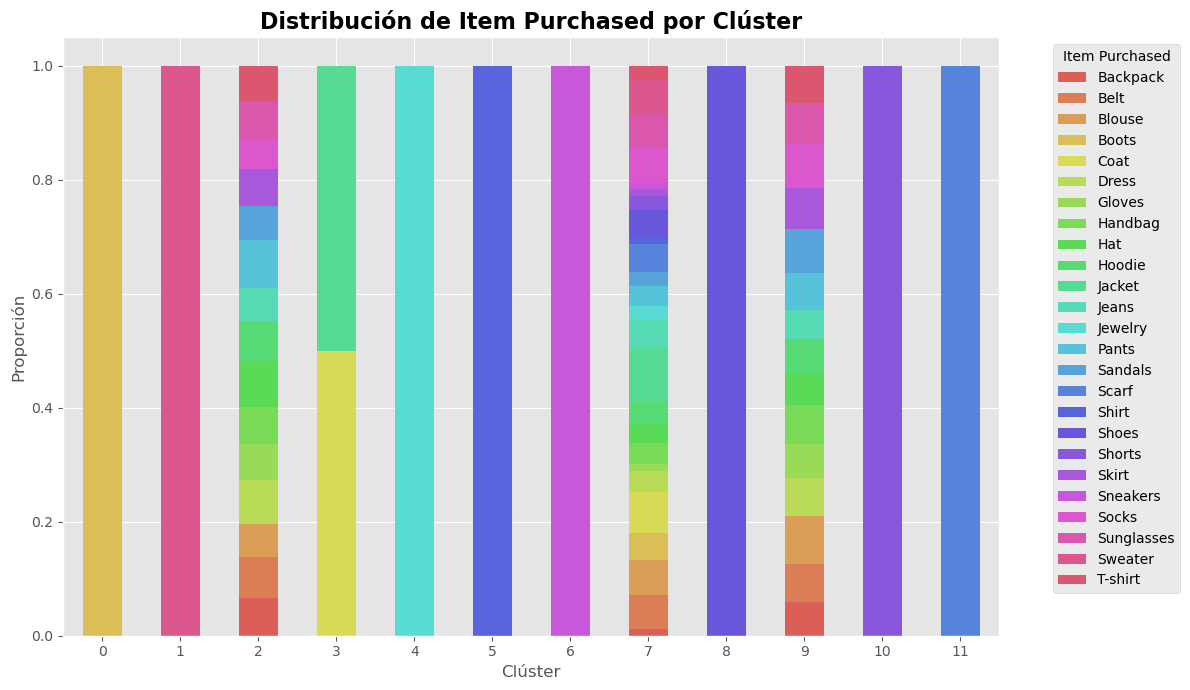


Tabla de Frecuencias Absolutas y Relativas (%) para 'Item Purchased' por Clúster:


Item Purchased,Backpack,Backpack %,Belt,Belt %,Blouse,Blouse %,Boots,Boots %,Coat,Coat %,Dress,Dress %,Gloves,Gloves %,Handbag,Handbag %,Hat,Hat %,Hoodie,Hoodie %,Jacket,Jacket %,Jeans,Jeans %,Jewelry,Jewelry %,Pants,Pants %,Sandals,Sandals %,Scarf,Scarf %,Shirt,Shirt %,Shoes,Shoes %,Shorts,Shorts %,Skirt,Skirt %,Sneakers,Sneakers %,Socks,Socks %,Sunglasses,Sunglasses %,Sweater,Sweater %,T-shirt,T-shirt %
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0.00,0,0.00,0,0.00,140,100.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,0,0.00
1,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,159,100.00,0,0.00
2,63,6.61,68,7.14,55,5.77,0,0.00,0,0.00,75,7.87,60,6.30,61,6.40,77,8.08,68,7.14,0,0.00,54,5.67,0,0.00,81,8.50,57,5.98,0,0.00,0,0.0,0,0.00,0,0.00,61,6.40,0,0.0,51,5.35,63,6.61,0,0.00,59,6.19
3,0,0.00,0,0.00,0,0.00,0,0.00,155,50.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,155,50.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,0,0.00
4,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,169,100.00,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,0,0.00
5,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,168,100.0,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,0,0.00
6,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,144,100.0,0,0.00,0,0.00,0,0.00,0,0.00
7,1,1.20,5,6.02,5,6.02,4,4.82,6,7.23,3,3.61,1,1.20,3,3.61,3,3.61,3,3.61,8,9.64,4,4.82,2,2.41,3,3.61,2,2.41,4,4.82,1,1.2,4,4.82,2,2.41,1,1.20,1,1.2,5,6.02,5,6.02,5,6.02,2,2.41
8,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,146,100.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,0,0.00




Análisis de la variable: 'Category' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

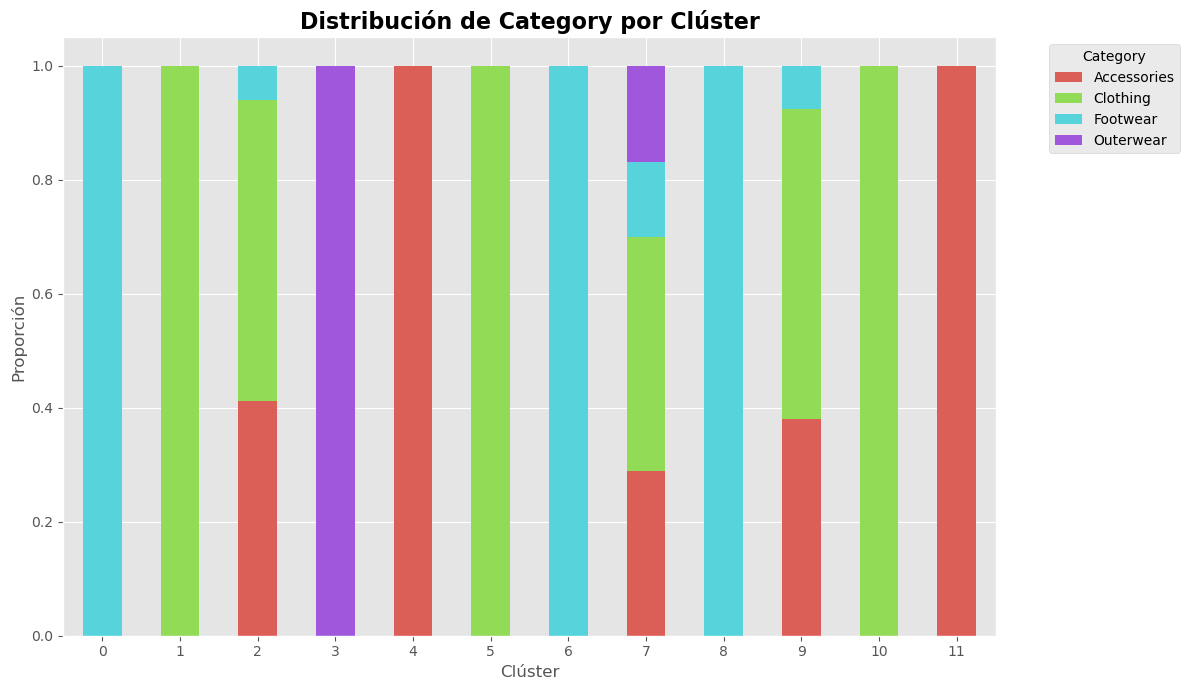


Tabla de Frecuencias Absolutas y Relativas (%) para 'Category' por Clúster:


Category,Accessories,Accessories %,Clothing,Clothing %,Footwear,Footwear %,Outerwear,Outerwear %
Cluster,,,,,,,,
0,0,0.00,0,0.00,140,100.00,0,0.00
1,0,0.00,159,100.00,0,0.00,0,0.00
2,392,41.13,504,52.89,57,5.98,0,0.00
3,0,0.00,0,0.00,0,0.00,310,100.00
4,169,100.00,0,0.00,0,0.00,0,0.00
5,0,0.00,168,100.00,0,0.00,0,0.00
6,0,0.00,0,0.00,144,100.00,0,0.00
7,24,28.92,34,40.96,11,13.25,14,16.87
8,0,0.00,0,0.00,146,100.00,0,0.00




Análisis de la variable: 'Location' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

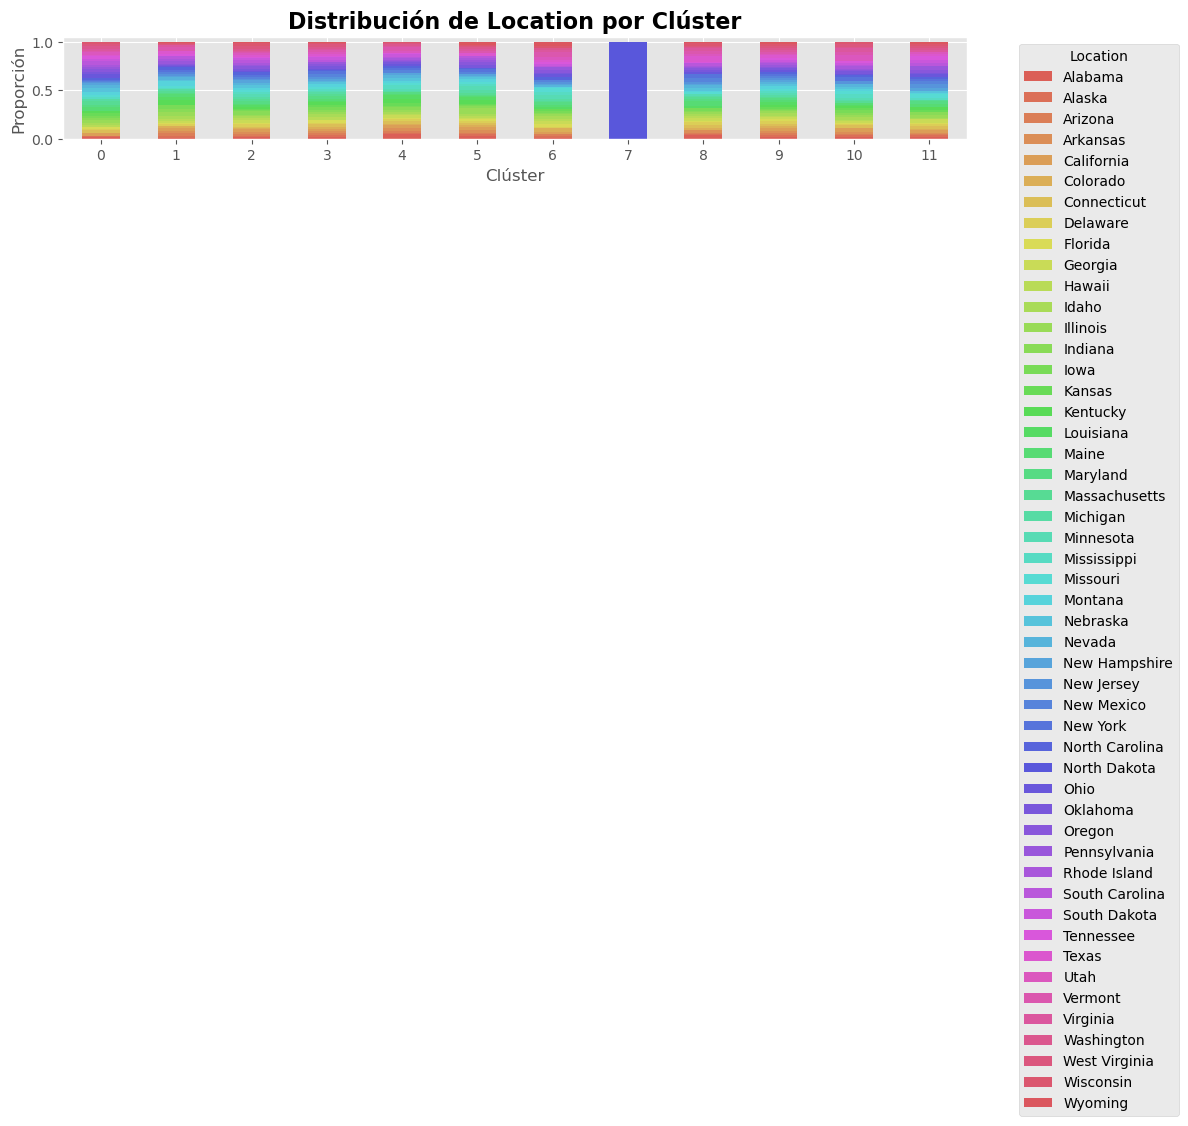


Tabla de Frecuencias Absolutas y Relativas (%) para 'Location' por Clúster:


Location,Alabama,Alabama %,Alaska,Alaska %,Arizona,Arizona %,Arkansas,Arkansas %,California,California %,Colorado,Colorado %,Connecticut,Connecticut %,Delaware,Delaware %,Florida,Florida %,Georgia,Georgia %,Hawaii,Hawaii %,Idaho,Idaho %,Illinois,Illinois %,Indiana,Indiana %,Iowa,Iowa %,Kansas,Kansas %,Kentucky,Kentucky %,Louisiana,Louisiana %,Maine,Maine %,Maryland,Maryland %,Massachusetts,Massachusetts %,Michigan,Michigan %,Minnesota,Minnesota %,Mississippi,Mississippi %,Missouri,Missouri %,Montana,Montana %,Nebraska,Nebraska %,Nevada,Nevada %,New Hampshire,New Hampshire %,New Jersey,New Jersey %,New Mexico,New Mexico %,New York,New York %,North Carolina,North Carolina %,North Dakota,North Dakota %,Ohio,Ohio %,Oklahoma,Oklahoma %,Oregon,Oregon %,Pennsylvania,Pennsylvania %,Rhode Island,Rhode Island %,South Carolina,South Carolina %,South Dakota,South Dakota %,Tennessee,Tennessee %,Texas,Texas %,Utah,Utah %,Vermont,Vermont %,Virginia,Virginia %,Washington,Washington %,West Virginia,West Virginia %,Wisconsin,Wisconsin %,Wyoming,Wyoming %
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,2.14,1,0.71,0,0.00,1,0.71,4,2.86,0,0.00,4,2.86,2,1.43,2,1.43,1,0.71,2,1.43,3,2.14,4,2.86,3,2.14,3,2.14,5,3.57,2,1.43,1,0.71,5,3.57,3,2.14,6,4.29,2,1.43,1,0.71,3,2.14,3,2.14,4,2.86,5,3.57,4,2.86,4,2.86,1,0.71,1,0.71,2,1.43,3,2.14,0,0.0,5,3.57,4,2.86,3,2.14,4,2.86,3,2.14,5,3.57,3,2.14,4,2.86,2,1.43,4,2.86,1,0.71,4,2.86,3,2.14,4,2.86,2,1.43,1,0.71
1,2,1.26,3,1.89,5,3.14,4,2.52,4,2.52,3,1.89,0,0.00,3,1.89,3,1.89,2,1.26,3,1.89,5,3.14,7,4.40,5,3.14,7,4.40,0,0.00,7,4.40,5,3.14,6,3.77,2,1.26,2,1.26,3,1.89,1,0.63,2,1.26,3,1.89,7,4.40,3,1.89,4,2.52,2,1.26,3,1.89,3,1.89,3,1.89,5,3.14,0,0.0,3,1.89,1,0.63,2,1.26,4,2.52,4,2.52,4,2.52,1,0.63,3,1.89,4,2.52,1,0.63,7,4.40,2,1.26,1,0.63,1,0.63,2,1.26,2,1.26
2,23,2.41,12,1.26,14,1.47,21,2.20,25,2.62,18,1.89,9,0.94,25,2.62,15,1.57,21,2.20,22,2.31,19,1.99,16,1.68,31,3.25,15,1.57,10,1.05,18,1.89,18,1.89,11,1.15,28,2.94,22,2.31,23,2.41,28,2.94,21,2.20,19,1.99,17,1.78,25,2.62,26,2.73,23,2.41,16,1.68,18,1.89,22,2.31,22,2.31,0,0.0,15,1.57,19,1.99,24,2.52,17,1.78,19,1.99,24,2.52,19,1.99,16,1.68,14,1.47,17,1.78,13,1.36,15,1.57,20,2.10,26,2.73,25,2.62,17,1.78
3,8,2.58,4,1.29,7,2.26,6,1.94,6,1.94,7,2.26,10,3.23,3,0.97,9,2.90,1,0.32,8,2.58,10,3.23,8,2.58,7,2.26,9,2.90,6,1.94,10,3.23,2,0.65,7,2.26,8,2.58,6,1.94,8,2.58,4,1.29,6,1.94,5,1.61,11,3.55,4,1.29,5,1.61,7,2.26,6,1.94,9,2.90,9,2.90,5,1.61,0,0.0,3,0.97,10,3.23,6,1.94,4,1.29,2,0.65,6,1.94,8,2.58,5,1.61,6,1.94,5,1.61,7,2.26,4,1.29,5,1.61,9,2.90,3,0.97,6,1.94
4,8,4.73,3,1.78,3,1.78,5,2.96,5,2.96,2,1.18,5,2.96,3,1.78,2,1.18,6,3.55,2,1.18,3,1.78,4,2.37,4,2.37,3,1.78,5,2.96,6,3.55,7,4.14,2,1.18,3,1.78,1,0.59,1,0.59,3,1.78,7,4.14,5,2.96,2,1.18,6,3.55,5,2.96,4,2.37,0,0.00,4,2.37,4,2.37,3,1.78,0,0.0,5,2.96,2,1.18,2,1.18,2,1.18,4,2.37,2,1.18,5,2.96,2,1.18,0,0.00,3,1.78,6,3.55,2,1.18,4,2.37,2,1.18,2,1.18,0,0.00
5,5,2.98,4,2.38,2,1.19,5,2.98,5,2.98,4,2.38,3,1.79,3,1.79,3,1.79,3,1.79,3,1.79,4,2.38,10,5.95,3,1.79,1,0.60,3,1.79,6,3.57,6,3.57,2,1.19,1,0.60,4,2.38,5,2.98,6,3.57,4,2.38,4,2.38,4,2.38,4,2.38,2,1.19,3,1.79,1,0.60,3,1.79,4,2.38,3,1.79,0,0.0,0,0.00,4,2.38,6,3.57,3,1.79,3,1.79,4,2.38,0,0.00,1,0.60,4,2.38,1,0.60,3,1.79,4,2.38,3,1.79,2,1.19,1,0.60,6,3.57
6,2,1.39,3,2.08,2,1.39,1,0.69,2,1.39,6,4.17,0,0.00,2,1.39,4,2.78,5,3.47,3,2.08,4,2.78,3,2.08,1,0.69,3,2.08,3,2.08,0,0.00,3,2.08,3,2.08,5,3.47,1,0.69,3,2.08,6,4.17,4,2.78,6,4.17,2,1.39,0,0.00,3,2.08,1,0.69,3,2.08,3,2.08,1,0.69,4,2.78,0,0.0,4,2.78,1,0.69,5,3.47,4,2.78,1,0.69,1,0.69,3,2.08,3,2.08,3,2.08,4,2.78,7,4.86,3,2.08,3,2.08,1,0.69,3,2.08,6,4.17
7,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,83,100.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,



Análisis de la variable: 'Size' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

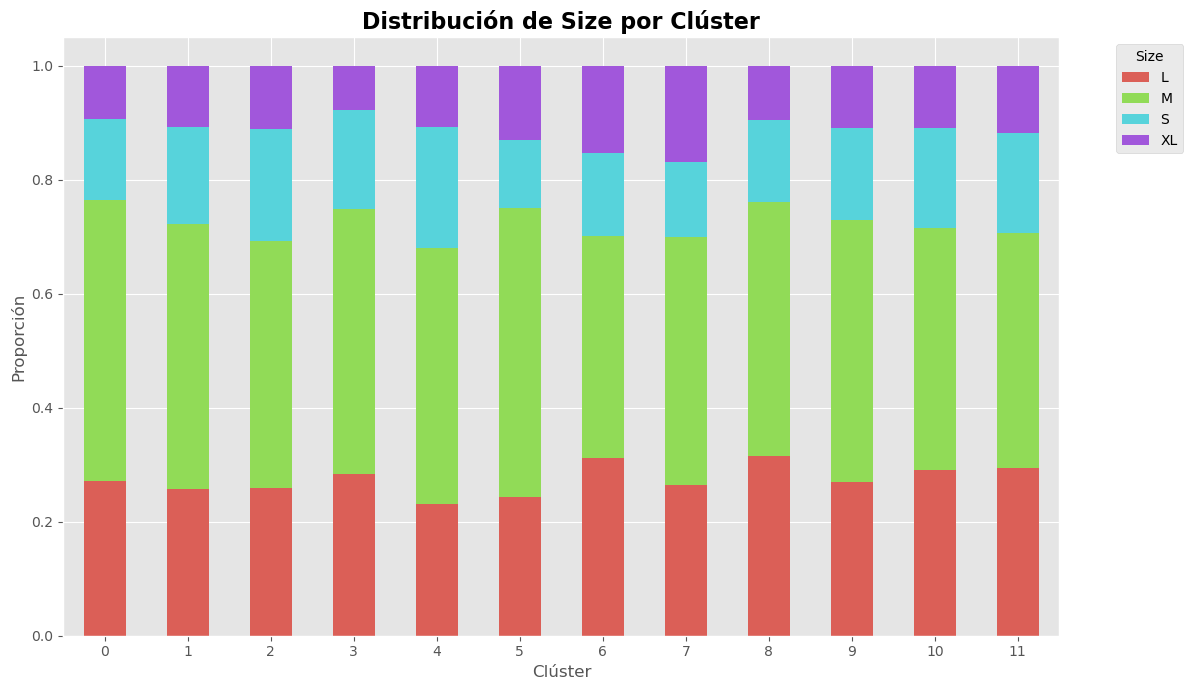


Tabla de Frecuencias Absolutas y Relativas (%) para 'Size' por Clúster:


Size,L,L %,M,M %,S,S %,XL,XL %
Cluster,,,,,,,,
0,38,27.14,69,49.29,20,14.29,13,9.29
1,41,25.79,74,46.54,27,16.98,17,10.69
2,247,25.92,413,43.34,187,19.62,106,11.12
3,88,28.39,144,46.45,54,17.42,24,7.74
4,39,23.08,76,44.97,36,21.30,18,10.65
5,41,24.40,85,50.60,20,11.90,22,13.10
6,45,31.25,56,38.89,21,14.58,22,15.28
7,22,26.51,36,43.37,11,13.25,14,16.87
8,46,31.51,65,44.52,21,14.38,14,9.59




Análisis de la variable: 'Color' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

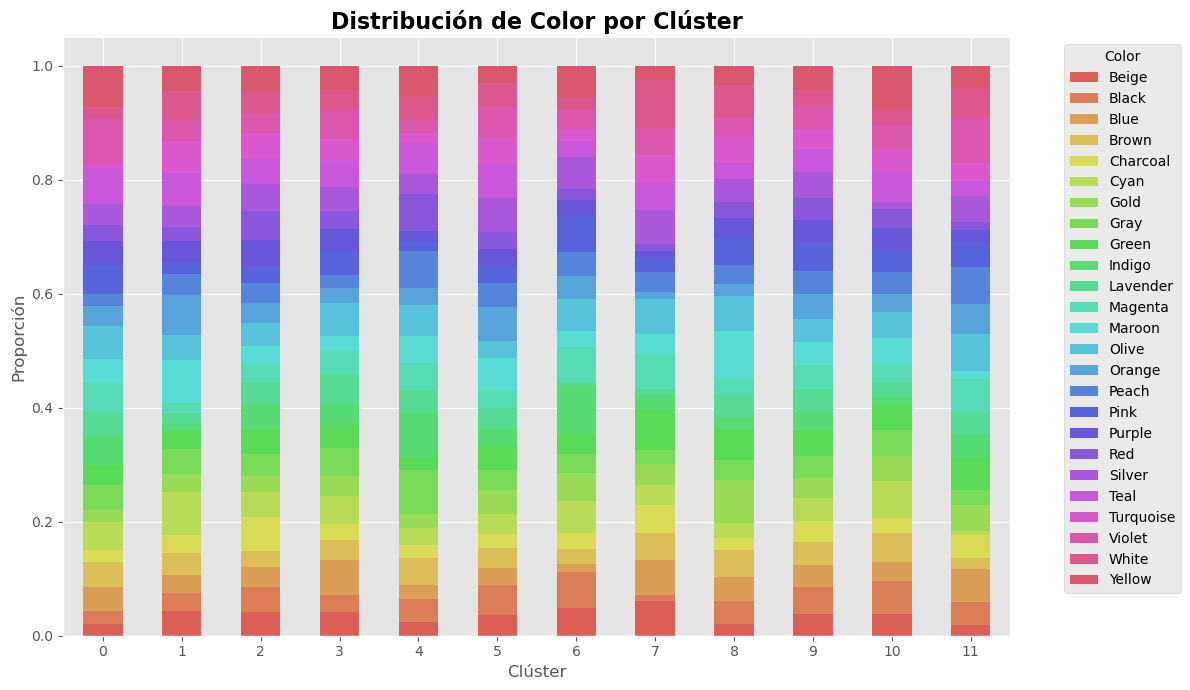


Tabla de Frecuencias Absolutas y Relativas (%) para 'Color' por Clúster:


Color,Beige,Beige %,Black,Black %,Blue,Blue %,Brown,Brown %,Charcoal,Charcoal %,Cyan,Cyan %,Gold,Gold %,Gray,Gray %,Green,Green %,Indigo,Indigo %,Lavender,Lavender %,Magenta,Magenta %,Maroon,Maroon %,Olive,Olive %,Orange,Orange %,Peach,Peach %,Pink,Pink %,Purple,Purple %,Red,Red %,Silver,Silver %,Teal,Teal %,Turquoise,Turquoise %,Violet,Violet %,White,White %,Yellow,Yellow %
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,2.14,3,2.14,6,4.29,6,4.29,3,2.14,7,5.00,3,2.14,6,4.29,5,3.57,7,5.00,6,4.29,7,5.00,6,4.29,8,5.71,5,3.57,3,2.14,7,5.00,6,4.29,4,2.86,5,3.57,9,6.43,1,0.71,11,7.86,3,2.14,10,7.14
1,7,4.40,5,3.14,5,3.14,6,3.77,5,3.14,12,7.55,5,3.14,7,4.40,5,3.14,2,1.26,3,1.89,3,1.89,12,7.55,7,4.40,11,6.92,6,3.77,3,1.89,6,3.77,4,2.52,6,3.77,9,5.66,9,5.66,6,3.77,8,5.03,7,4.40
2,39,4.09,42,4.41,34,3.57,26,2.73,58,6.09,41,4.30,27,2.83,37,3.88,42,4.41,41,4.30,37,3.88,30,3.15,31,3.25,38,3.99,34,3.57,33,3.46,26,2.73,45,4.72,49,5.14,45,4.72,43,4.51,42,4.41,34,3.57,35,3.67,44,4.62
3,13,4.19,9,2.90,19,6.13,11,3.55,9,2.90,15,4.84,11,3.55,15,4.84,13,4.19,11,3.55,16,5.16,13,4.19,8,2.58,18,5.81,8,2.58,7,2.26,13,4.19,12,3.87,10,3.23,13,4.19,14,4.52,12,3.87,16,5.16,11,3.55,13,4.19
4,4,2.37,7,4.14,4,2.37,8,4.73,4,2.37,5,2.96,4,2.37,13,7.69,4,2.37,13,7.69,7,4.14,8,4.73,8,4.73,9,5.33,5,2.96,11,6.51,3,1.78,3,1.78,11,6.51,6,3.55,9,5.33,3,1.78,4,2.37,7,4.14,9,5.33
5,6,3.57,9,5.36,5,2.98,6,3.57,4,2.38,6,3.57,7,4.17,6,3.57,7,4.17,5,2.98,6,3.57,5,2.98,10,5.95,5,2.98,10,5.95,7,4.17,5,2.98,5,2.98,5,2.98,10,5.95,10,5.95,8,4.76,9,5.36,7,4.17,5,2.98
6,7,4.86,9,6.25,2,1.39,4,2.78,4,2.78,8,5.56,7,4.86,5,3.47,5,3.47,12,8.33,1,0.69,9,6.25,4,2.78,8,5.56,6,4.17,6,4.17,9,6.25,4,2.78,3,2.08,8,5.56,4,2.78,3,2.08,5,3.47,3,2.08,8,5.56
7,5,6.02,1,1.20,5,6.02,4,4.82,4,4.82,3,3.61,3,3.61,2,2.41,6,7.23,2,2.41,1,1.20,5,6.02,3,3.61,5,6.02,1,1.20,3,3.61,2,2.41,1,1.20,1,1.20,5,6.02,4,4.82,4,4.82,4,4.82,7,8.43,2,2.41
8,3,2.05,6,4.11,6,4.11,7,4.79,3,2.05,4,2.74,11,7.53,5,3.42,8,5.48,3,2.05,6,4.11,4,2.74,12,8.22,9,6.16,3,2.05,5,3.42,7,4.79,5,3.42,4,2.74,6,4.11,4,2.74,7,4.79,5,3.42,8,5.48,5,3.42




Análisis de la variable: 'Season' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

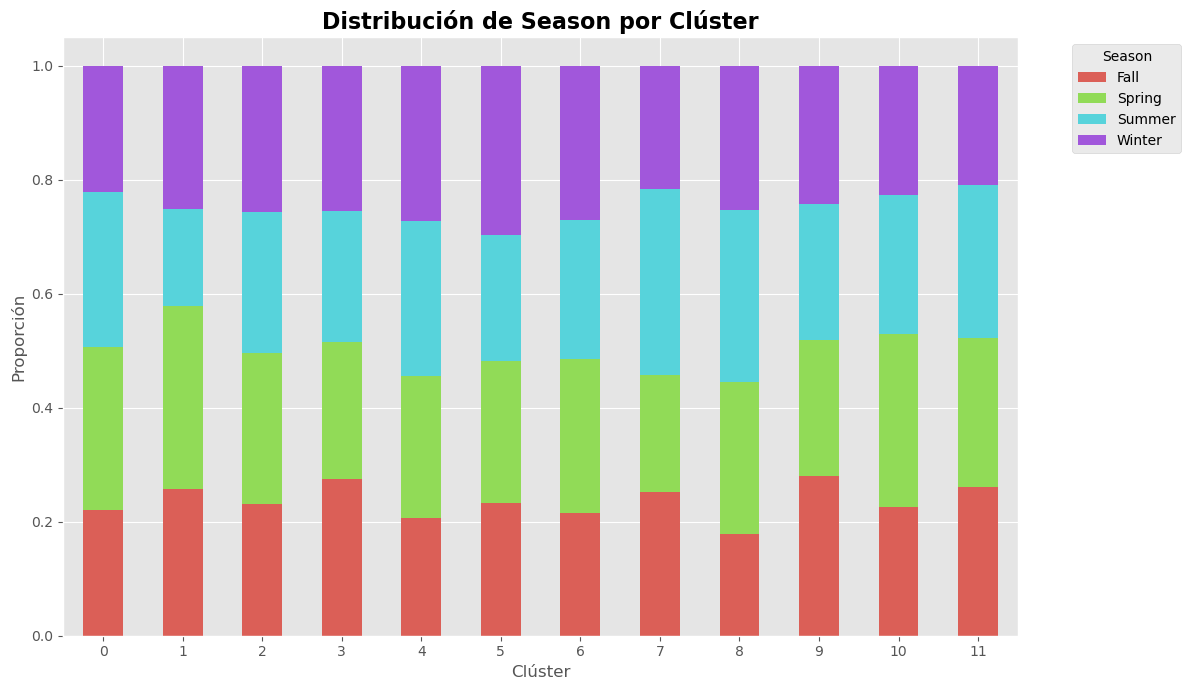


Tabla de Frecuencias Absolutas y Relativas (%) para 'Season' por Clúster:


Season,Fall,Fall %,Spring,Spring %,Summer,Summer %,Winter,Winter %
Cluster,,,,,,,,
0,31,22.14,40,28.57,38,27.14,31,22.14
1,41,25.79,51,32.08,27,16.98,40,25.16
2,221,23.19,251,26.34,236,24.76,245,25.71
3,85,27.42,75,24.19,71,22.90,79,25.48
4,35,20.71,42,24.85,46,27.22,46,27.22
5,39,23.21,42,25.00,37,22.02,50,29.76
6,31,21.53,39,27.08,35,24.31,39,27.08
7,21,25.30,17,20.48,27,32.53,18,21.69
8,26,17.81,39,26.71,44,30.14,37,25.34




Análisis de la variable: 'Subscription Status' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

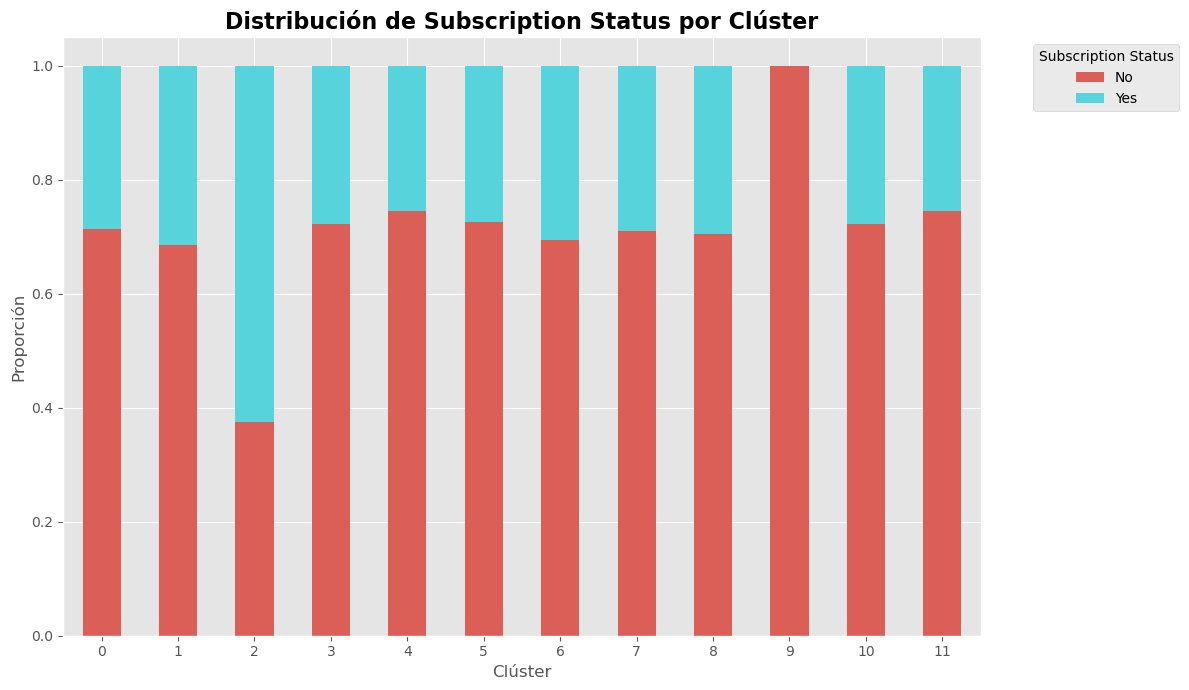


Tabla de Frecuencias Absolutas y Relativas (%) para 'Subscription Status' por Clúster:


Subscription Status,No,No %,Yes,Yes %
Cluster,,,,
0,100,71.43,40,28.57
1,109,68.55,50,31.45
2,358,37.57,595,62.43
3,224,72.26,86,27.74
4,126,74.56,43,25.44
5,122,72.62,46,27.38
6,100,69.44,44,30.56
7,59,71.08,24,28.92
8,103,70.55,43,29.45




Análisis de la variable: 'Payment Method' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

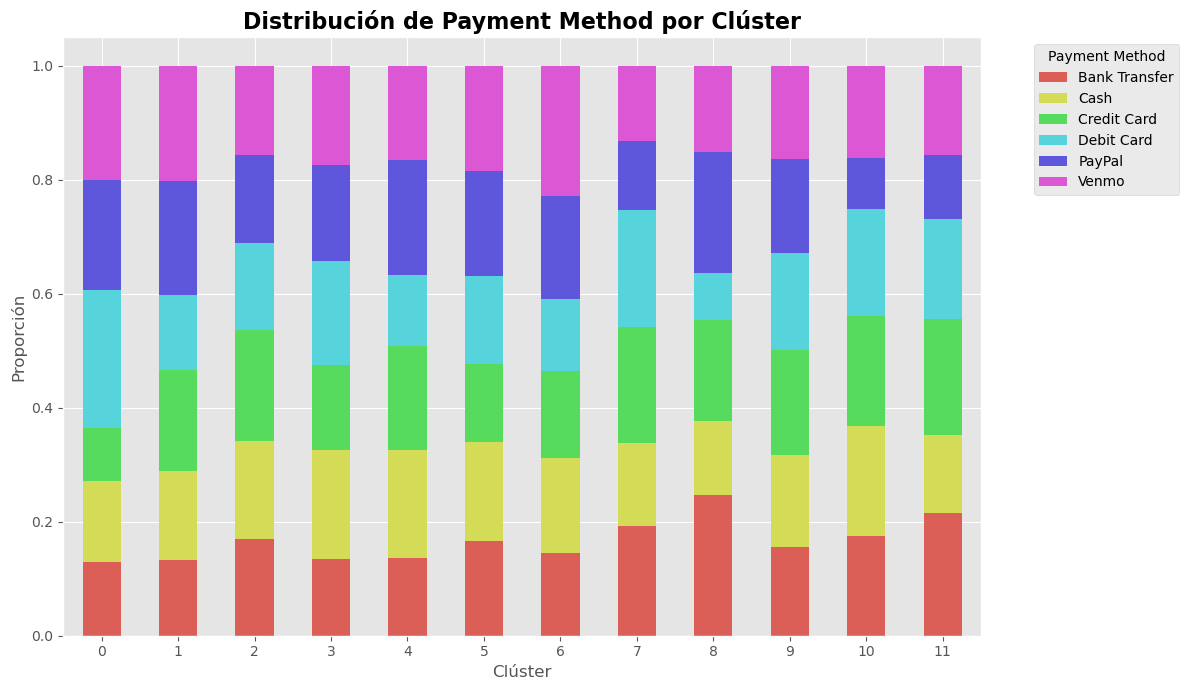


Tabla de Frecuencias Absolutas y Relativas (%) para 'Payment Method' por Clúster:


Payment Method,Bank Transfer,Bank Transfer %,Cash,Cash %,Credit Card,Credit Card %,Debit Card,Debit Card %,PayPal,PayPal %,Venmo,Venmo %
Cluster,,,,,,,,,,,,
0,18,12.86,20,14.29,13,9.29,34,24.29,27,19.29,28,20.00
1,21,13.21,25,15.72,28,17.61,21,13.21,32,20.13,32,20.13
2,161,16.89,164,17.21,186,19.52,146,15.32,147,15.42,149,15.63
3,42,13.55,59,19.03,46,14.84,57,18.39,52,16.77,54,17.42
4,23,13.61,32,18.93,31,18.34,21,12.43,34,20.12,28,16.57
5,28,16.67,29,17.26,23,13.69,26,15.48,31,18.45,31,18.45
6,21,14.58,24,16.67,22,15.28,18,12.50,26,18.06,33,22.92
7,16,19.28,12,14.46,17,20.48,17,20.48,10,12.05,11,13.25
8,36,24.66,19,13.01,26,17.81,12,8.22,31,21.23,22,15.07




Análisis de la variable: 'Shipping Type' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

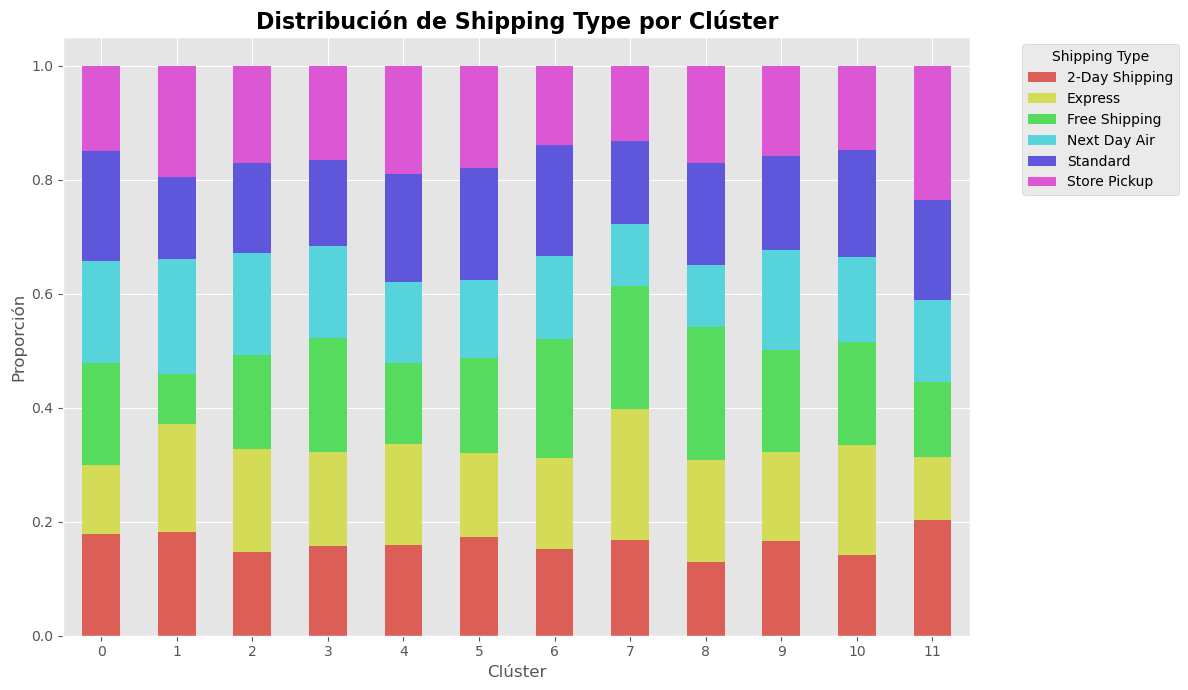


Tabla de Frecuencias Absolutas y Relativas (%) para 'Shipping Type' por Clúster:


Shipping Type,2-Day Shipping,2-Day Shipping %,Express,Express %,Free Shipping,Free Shipping %,Next Day Air,Next Day Air %,Standard,Standard %,Store Pickup,Store Pickup %
Cluster,,,,,,,,,,,,
0,25,17.86,17,12.14,25,17.86,25,17.86,27,19.29,21,15.00
1,29,18.24,30,18.87,14,8.81,32,20.13,23,14.47,31,19.50
2,140,14.69,172,18.05,157,16.47,171,17.94,151,15.84,162,17.00
3,49,15.81,51,16.45,62,20.00,50,16.13,47,15.16,51,16.45
4,27,15.98,30,17.75,24,14.20,24,14.20,32,18.93,32,18.93
5,29,17.26,25,14.88,28,16.67,23,13.69,33,19.64,30,17.86
6,22,15.28,23,15.97,30,20.83,21,14.58,28,19.44,20,13.89
7,14,16.87,19,22.89,18,21.69,9,10.84,12,14.46,11,13.25
8,19,13.01,26,17.81,34,23.29,16,10.96,26,17.81,25,17.12




Análisis de la variable: 'Discount Applied' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

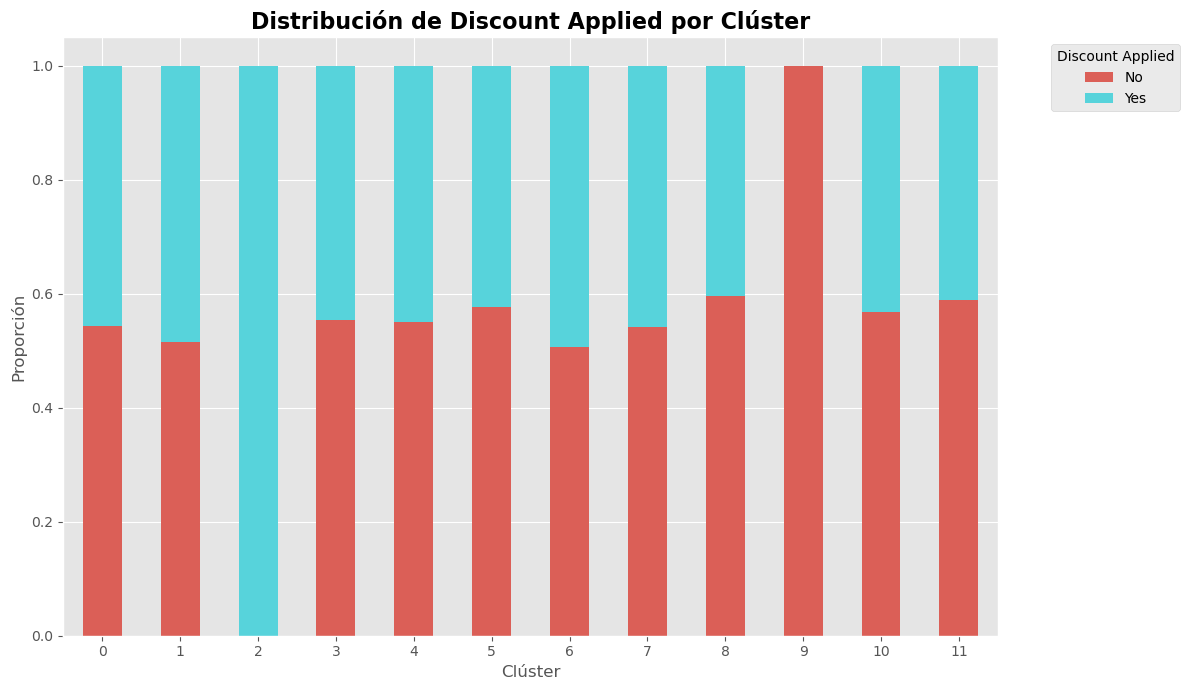


Tabla de Frecuencias Absolutas y Relativas (%) para 'Discount Applied' por Clúster:


Discount Applied,No,No %,Yes,Yes %
Cluster,,,,
0,76,54.29,64,45.71
1,82,51.57,77,48.43
2,0,0.00,953,100.00
3,172,55.48,138,44.52
4,93,55.03,76,44.97
5,97,57.74,71,42.26
6,73,50.69,71,49.31
7,45,54.22,38,45.78
8,87,59.59,59,40.41




Análisis de la variable: 'Promo Code Used' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

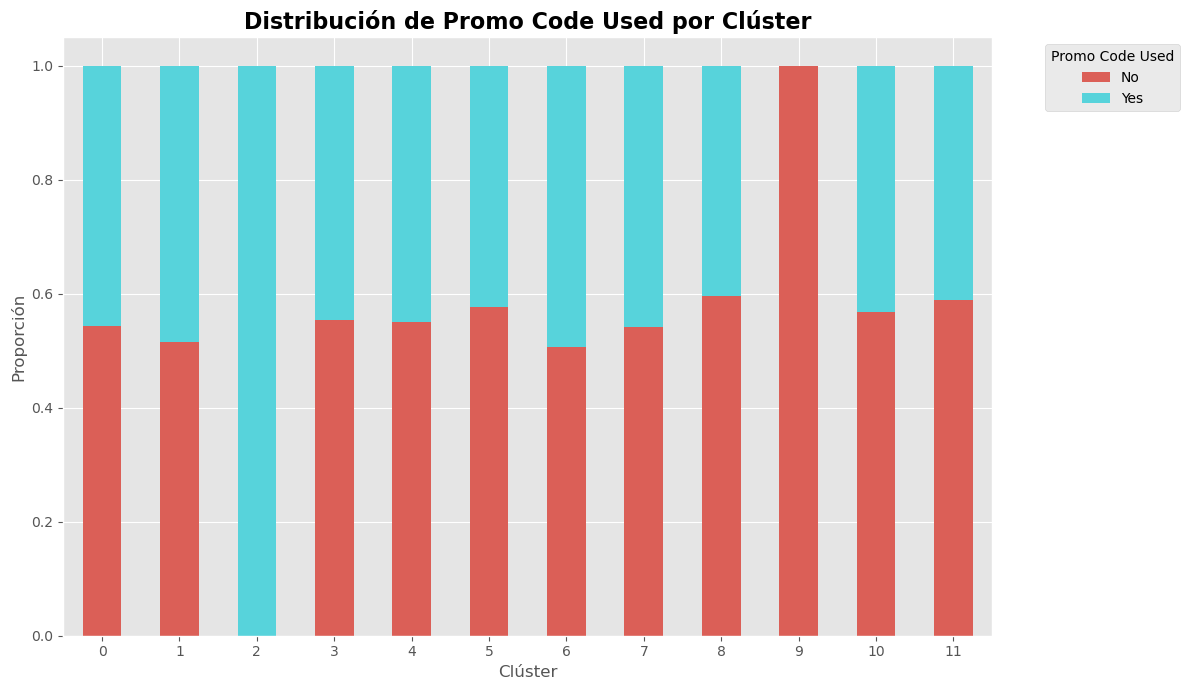


Tabla de Frecuencias Absolutas y Relativas (%) para 'Promo Code Used' por Clúster:


Promo Code Used,No,No %,Yes,Yes %
Cluster,,,,
0,76,54.29,64,45.71
1,82,51.57,77,48.43
2,0,0.00,953,100.00
3,172,55.48,138,44.52
4,93,55.03,76,44.97
5,97,57.74,71,42.26
6,73,50.69,71,49.31
7,45,54.22,38,45.78
8,87,59.59,59,40.41




Análisis de la variable: 'Preferred Payment Method' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

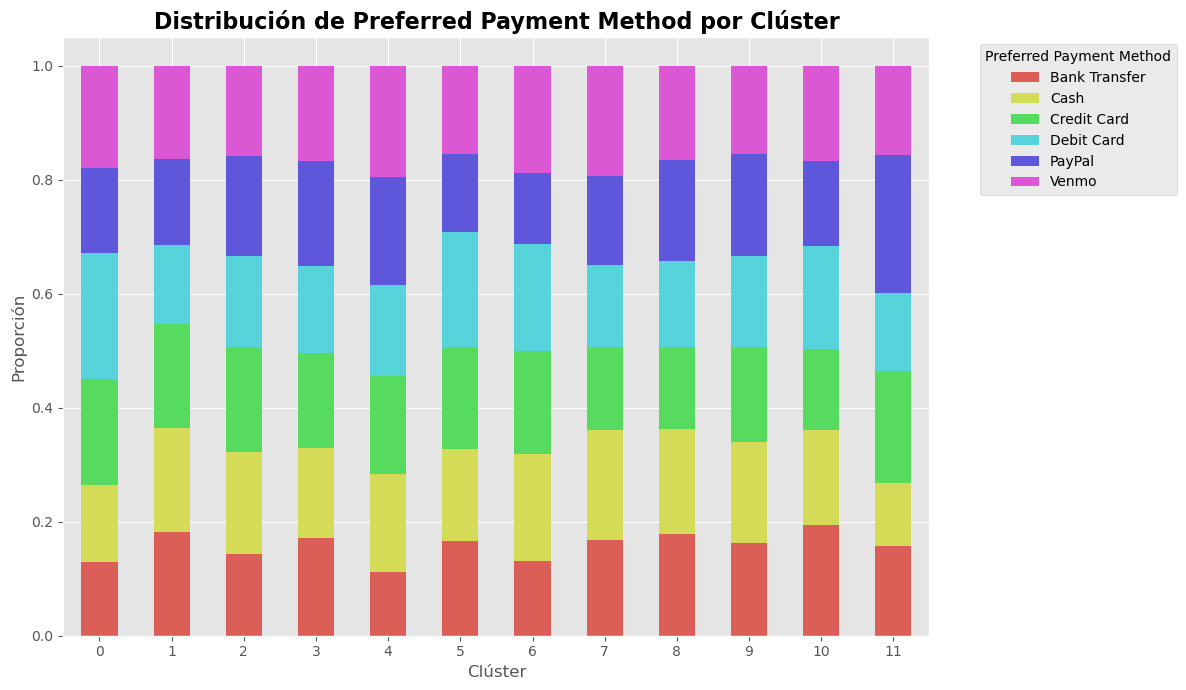


Tabla de Frecuencias Absolutas y Relativas (%) para 'Preferred Payment Method' por Clúster:


Preferred Payment Method,Bank Transfer,Bank Transfer %,Cash,Cash %,Credit Card,Credit Card %,Debit Card,Debit Card %,PayPal,PayPal %,Venmo,Venmo %
Cluster,,,,,,,,,,,,
0,18,12.86,19,13.57,26,18.57,31,22.14,21,15.00,25,17.86
1,29,18.24,29,18.24,29,18.24,22,13.84,24,15.09,26,16.35
2,137,14.38,170,17.84,175,18.36,153,16.05,167,17.52,151,15.84
3,53,17.10,49,15.81,52,16.77,47,15.16,57,18.39,52,16.77
4,19,11.24,29,17.16,29,17.16,27,15.98,32,18.93,33,19.53
5,28,16.67,27,16.07,30,17.86,34,20.24,23,13.69,26,15.48
6,19,13.19,27,18.75,26,18.06,27,18.75,18,12.50,27,18.75
7,14,16.87,16,19.28,12,14.46,12,14.46,13,15.66,16,19.28
8,26,17.81,27,18.49,21,14.38,22,15.07,26,17.81,24,16.44




Análisis de la variable: 'Frequency of Purchases' vs 'Cluster'
--------------------------------------------------


<Figure size 1200x700 with 0 Axes>

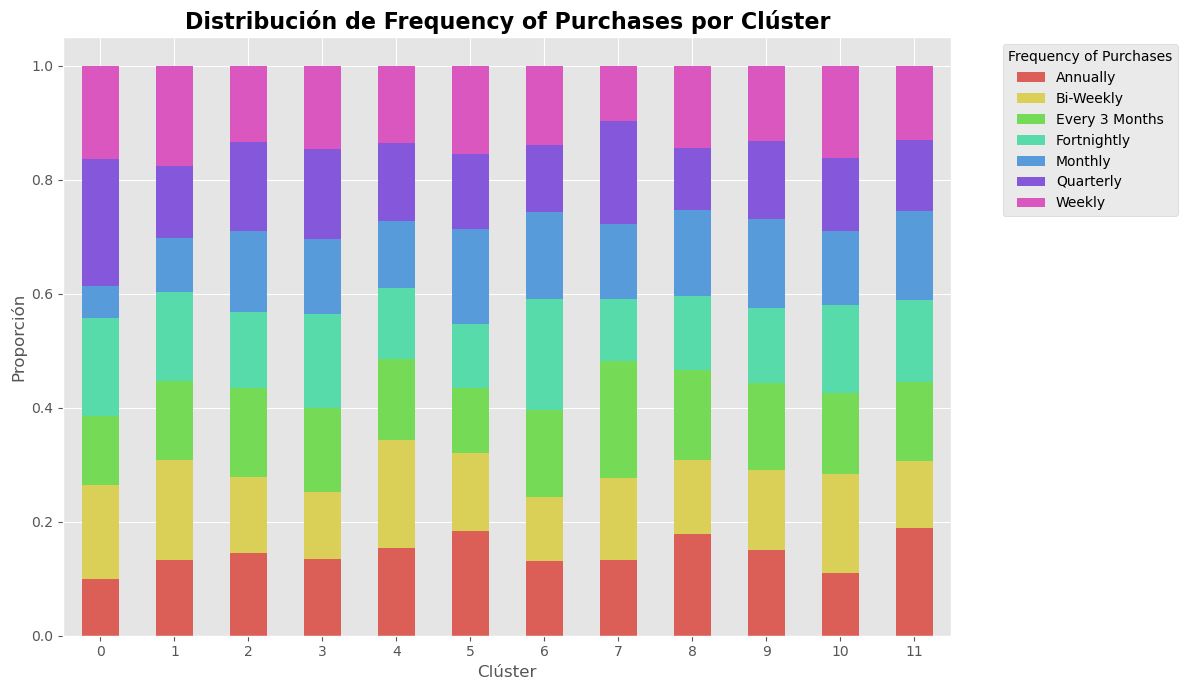


Tabla de Frecuencias Absolutas y Relativas (%) para 'Frequency of Purchases' por Clúster:


Frequency of Purchases,Annually,Annually %,Bi-Weekly,Bi-Weekly %,Every 3 Months,Every 3 Months %,Fortnightly,Fortnightly %,Monthly,Monthly %,Quarterly,Quarterly %,Weekly,Weekly %
Cluster,,,,,,,,,,,,,,
0,14,10.00,23,16.43,17,12.14,24,17.14,8,5.71,31,22.14,23,16.43
1,21,13.21,28,17.61,22,13.84,25,15.72,15,9.43,20,12.58,28,17.61
2,138,14.48,127,13.33,150,15.74,127,13.33,135,14.17,149,15.63,127,13.33
3,42,13.55,36,11.61,46,14.84,51,16.45,41,13.23,49,15.81,45,14.52
4,26,15.38,32,18.93,24,14.20,21,12.43,20,11.83,23,13.61,23,13.61
5,31,18.45,23,13.69,19,11.31,19,11.31,28,16.67,22,13.10,26,15.48
6,19,13.19,16,11.11,22,15.28,28,19.44,22,15.28,17,11.81,20,13.89
7,11,13.25,12,14.46,17,20.48,9,10.84,11,13.25,15,18.07,8,9.64
8,26,17.81,19,13.01,23,15.75,19,13.01,22,15.07,16,10.96,21,14.38


In [3]:
# Identificamos las variables categóricas para el análisis, incluyendo 'object' y 'category'
categorical_cols = df_customer.select_dtypes(include=['object', 'category']).columns.tolist()
# Excluimos 'Cluster' de la lista de variables a analizar
categorical_cols.remove('Cluster')

print(f"Variables categóricas a analizar: {categorical_cols}")
print("\n" + "="*80 + "\n")

# Iteramos sobre cada variable categórica
for col in categorical_cols:
    print(f"Análisis de la variable: '{col}' vs 'Cluster'")
    print("--------------------------------------------------")

    # --- Generación del Gráfico de Barras Apiladas ---

    # Creamos una tabla de contingencia que agrupa por 'Cluster' y la variable actual
    contingency_table = pd.crosstab(df_customer['Cluster'], df_customer[col], normalize='index')
    
    # Creamos el gráfico de barras apiladas
    plt.figure(figsize=(12, 7))
    
    # Paleta de colores dinámica 
    # Creamos una paleta de colores con la misma cantidad de colores que categorías
    # Usamos la paleta "hls" de seaborn para un alto contraste
    num_categories = len(contingency_table.columns)
    color_palette = sns.color_palette("hls", num_categories)
    
    # Pasamos la paleta personalizada al parámetro 'color' del método plot
    contingency_table.plot(kind='bar', stacked=True, figsize=(12, 7), color=color_palette)
    
    # Personalizamos el gráfico
    plt.title(f'Distribución de {col} por Clúster', fontsize=16, fontweight='bold')
    plt.xlabel('Clúster', fontsize=12)
    plt.ylabel('Proporción', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Generación de la Tabla de Frecuencias Absolutas y Relativas 

    print(f"\nTabla de Frecuencias Absolutas y Relativas (%) para '{col}' por Clúster:")
    # Creamos la tabla de contingencia de frecuencias absolutas
    absolute_counts = pd.crosstab(df_customer['Cluster'], df_customer[col])

    # Creamos la tabla de contingencia de frecuencias relativas (porcentaje)
    relative_counts = (pd.crosstab(df_customer['Cluster'], df_customer[col], normalize='index') * 100).round(2)
    
    # Combinamos ambas tablas en un solo DataFrame
    combined_counts = pd.concat([absolute_counts, relative_counts.add_suffix(' %')], axis=1)

    # Ordenamos las columnas para un mejor formato
    new_cols_order = []
    for category in absolute_counts.columns:
        new_cols_order.append(category)
        new_cols_order.append(f'{category} %')
    
    # Usamos display() para asegurarnos de que el DataFrame se muestre correctamente
    display(combined_counts[new_cols_order])
    print("\n" + "="*80 + "\n")

### Analisis de Caracteristicas Distintivas de Clusteres

Una vez que hemos segmentado los datos en clusteres y hemos graficado las distintas categorias representativas de los mismos junto con sus tablas de frecuencias, el siguiente paso crucial es comprender que hace que cada uno sea unico. No basta con saber que los datos estan agrupados; es fundamental identificar las caracteristicas distintivas que definen a cada segmento.

El siguiente codigo está diseñado para realizar precisamente esta tarea de una manera mas precisa y confiable, combinando dos pasos clave:

1. El Filtro de Relevancia
Este primer paso es un filtro practico. Para cada variable categorica, el codigo calcula el Indice de Relevancia, que mide que tan mas comun es una caracteristica en un cluster especifico en comparación con la poblacion total. Esto nos permite identificar rapidamente las caracteristicas que tienen una aparicion notablemente mayor en el cluster.

2. La Validacion Estadistica
Una vez que las caracteristicas han pasado el filtro de relevancia, se aplica el test de Chi-cuadrado. Esta prueba estadistica confirma si la diferencia observada es genuina y significativa, o si es simplemente un resultado del azar.

El resultado final será una tabla clara y concisa que resume las variables más distintivas para cada cluster, proporcionando informacion clave para la toma de decisiones estrategicas. Ahora, podemos estar seguros de que las caracteristicas que identifiquemos no solo son notables, sino también estadisticamente solidas y distintivas de cada grupo.

In [4]:
# Define el nombre de la columna del clúster
cluster_column_name = 'Cluster'
if cluster_column_name in df_customer.columns:
    df_customer[cluster_column_name] = df_customer[cluster_column_name].astype('category')

# Identifica las variables categóricas. Busca tipos 'object' y 'category'.
categorical_columns = df_customer.select_dtypes(include=['object', 'category']).columns.tolist()

# Si la columna de clúster se detecta como categórica, la removemos de la lista de variables.
if cluster_column_name in categorical_columns:
    categorical_columns.remove(cluster_column_name)

In [5]:
# ---
# ¿Como analizamos la representacion proporcional de cada categoria?
# ---
# La función `analyze_category_proportions` compara la distribucion de una variable
# categorica en un clúster con la del total de la poblacion.

def analyze_category_proportions(df, cluster_col, categorical_col, cluster_id):
    """
    Compara la distribucion de una variable categórica en un cluster
    específico con la distribucion de la misma variable en el total de la población.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos.
        cluster_col (str): El nombre de la columna del clúster.
        categorical_col (str): El nombre de la variable categórica a analizar.
        cluster_id (int): El ID del clúster de interés.

    Returns:
        pd.DataFrame: Una tabla que compara las proporciones e indica el índice de relevancia.
    """
    # Crea un sub-DataFrame para el clúster seleccionado
    cluster_df = df[df[cluster_col] == cluster_id]

    # Calcula la frecuencia y proporción de cada categoría en el clúster
    cluster_proportions = cluster_df[categorical_col].value_counts(normalize=True)

    # Calcula la frecuencia y proporción de cada categoría en la población total
    total_proportions = df[categorical_col].value_counts(normalize=True)

    # Combina las proporciones en un solo DataFrame para su comparación
    results_df = pd.DataFrame({
        f'Proporción en Clúster {cluster_id}': cluster_proportions,
        'Proporción en el Total': total_proportions
    }).fillna(0)  # Llena los valores faltantes con 0 para evitar errores

    # Calcula el 'Índice de Relevancia'
    results_df['Índice de Relevancia'] = results_df[f'Proporción en Clúster {cluster_id}'] / results_df['Proporción en el Total']

    # Devuelve el DataFrame de resultados
    return results_df

# ---
# ¿Cómo obtengo un resumen de las características distintivas con validación?
# ---
# La función `get_distinctive_summary_with_pvalue` ahora solo devuelve las
# características que tienen un índice de relevancia alto y que son
# estadísticamente significativas.

def get_distinctive_summary_with_pvalue(df, cluster_col, categorical_cols, cluster_id, relevance_threshold=1.5, pvalue_threshold=0.05):
    """
    Genera una tabla resumen de todas las características distintivas para un
    clúster específico, filtrando por relevancia y significancia estadística.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos.
        cluster_col (str): El nombre de la columna del clúster.
        categorical_cols (list): Lista de nombres de columnas categóricas a analizar.
        cluster_id (int): El ID del clúster de interés.
        relevance_threshold (float): Umbral para considerar una categoría como "distintiva".
        pvalue_threshold (float): Umbral para considerar una diferencia como
                                   estadísticamente significativa.

    Returns:
        pd.DataFrame: Una tabla resumen con las características distintivas y su p-valor.
    """
    if cluster_id not in df[cluster_col].unique():
        return f"Error: El Clúster {cluster_id} no existe."
    
    distinctive_features_list = []

    for col in categorical_cols:
        proportions_df = analyze_category_proportions(df, cluster_col, col, cluster_id)
        
        distinctive_rows = proportions_df[proportions_df['Índice de Relevancia'] > relevance_threshold].copy()
        
        if not distinctive_rows.empty:
            # Creamos la tabla de contingencia para el test Chi-cuadrado
            contingency_table = pd.crosstab(df[col], df[cluster_col])
            
            # Hacemos la prueba de Chi-cuadrado para la característica
            try:
                chi2, p_valor, _, _ = chi2_contingency(contingency_table)
            except ValueError:
                p_valor = 1.0 # Si la tabla de contingencia es muy pequeña, asumimos que no es significativo

            # Solo agregamos la característica si el p-valor es menor que el umbral
            if p_valor < pvalue_threshold:
                distinctive_rows['P-valor'] = p_valor
                distinctive_rows.rename_axis('Categoría', inplace=True)
                distinctive_rows.reset_index(inplace=True)
                distinctive_rows['Característica Distintiva'] = col
                distinctive_features_list.append(distinctive_rows)
    
    if distinctive_features_list:
        summary_df = pd.concat(distinctive_features_list, ignore_index=True)
        summary_df = summary_df[['Característica Distintiva', 'Categoría', 'Índice de Relevancia', 'P-valor']].sort_values(by='Índice de Relevancia', ascending=False)
        return summary_df
    else:
        return "No se encontraron características distintivas para este clúster con los umbrales dados."


In [9]:
# ---
# # Ejemplo de uso:
# ---
# Vamos a obtener el resumen de características distintivas para el Clúster 1.
# Ahora se aplica el filtro de significancia estadística (p-valor < 0.05).

cluster_a_analizar = 11
umbral_de_relevancia = 1.5
umbral_de_pvalor = 0.05

# Imprime un título claro para la tabla, indicando el clúster
print(f"### Características Distintivas para el Clúster {cluster_a_analizar} ###")
print("---")

# Ejecuta la función principal para obtener el resumen
summary = get_distinctive_summary_with_pvalue(
    df=df_customer,
    cluster_col=cluster_column_name,
    categorical_cols=categorical_columns,
    cluster_id=cluster_a_analizar,
    relevance_threshold=umbral_de_relevancia,
    pvalue_threshold=umbral_de_pvalor
)

# Verifica si el resultado es un DataFrame antes de imprimir.
# Si es un DataFrame, lo convierte a formato Markdown.
# Si no lo es, imprime el mensaje de texto directamente.
if isinstance(summary, pd.DataFrame):
    print(summary.to_markdown(index=False))
else:
    print(summary)

### Características Distintivas para el Clúster 11 ###
---
| Característica Distintiva   | Categoría    |   Índice de Relevancia |   P-valor |
|:----------------------------|:-------------|-----------------------:|----------:|
| Item Purchased              | Scarf        |               24.8408  |         0 |
| Category                    | Accessories  |                3.14516 |         0 |
| Location                    | New Jersey   |                2.2827  |         0 |
| Location                    | Pennsylvania |                2.06677 |         0 |
| Location                    | Tennessee    |                1.98625 |         0 |
| Location                    | South Dakota |                1.82073 |         0 |
| Location                    | Ohio         |                1.65521 |         0 |
| Location                    | Georgia      |                1.6133  |         0 |
| Location                    | Kentucky     |                1.6133  |         0 |
| Location       